# Inverse encoding, Inverse transform and Decoding Categorical Variables:
is converting the encoded data back to its original form. This is done by using the inverse_transform() method. This method is available for the following encoders:
1. LabelEncoder
2. OneHotEncoder
3. OrdinalEncoder

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [11]:
df= sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
le_sex= LabelEncoder()
le_class= LabelEncoder()
le_embarked= LabelEncoder()

df['sex']= le_sex.fit_transform(df['sex'])
df['embarked']= le_embarked.fit_transform(df['embarked'])

In [17]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True


In [18]:
df['sex']= le_sex.inverse_transform(df['sex'])

In [19]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True


# Use the OneHotEncoder:

In [20]:
data= sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [22]:
le_sex= OneHotEncoder()
data['sex']= le_sex.fit_transform(df[['sex']]).toarray()

In [23]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0.0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1.0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,1.0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1.0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,0.0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Five way to impute the missing values:
1. SimpleImputer Techniques(mean, median, mode).
2. KNN
3. Regression Imputation(use a regression model to predict the missing values based on the similarity of rows.)
4. Decision Tree and Random Forest
5. Advanced Techniques(Mutiple imputation by chained Equations MICE)
6. Time Series specific methods(ffill, bfill)

# Impute the missing values using KNN imputer:

In [41]:
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer

In [42]:
df= sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [44]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [49]:
imputer= KNNImputer(n_neighbors=5)
df['age']= imputer.fit_transform(df[['age']])

In [50]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

# Regression Imputation:

In [51]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import seaborn as sns
df= sns.load_dataset('titanic')

df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [52]:
imputer= IterativeImputer(max_iter=10)

df['age']= imputer.fit_transform(df[['age']])

In [ ]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

# Impute thet missing values using Random Forest tree Algorithm:

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

df= sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [80]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [ ]:
df.drop('deck', inplace=True, axis=1)
# Columns to encode
col_to_encode= ['sex', 'embarked', 'who', 'class', 'embark_town', 'alive']

# Dict to store LabelEncoder to each column
label_encoder= {}

# Loop to apply LabelEncoder to each column
for col in col_to_encode:
    # Create a new LabelEncoder for the column
    le= LabelEncoder()

    # Fit and transform the data, then inverse transform it
    df[col]= le.fit_transform(df[col])

    # Store the encoder in the dictionary
    label_encoder[col]= le

# Check the first few rows of the DataFrame
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


We have to first impute the missing values in the age column before we can use it to predict the missing values in the `embarked` and `embark_town` columns.

In [ ]:
# Split the dataset into two parts:one with missing values, one without missing values
df_with_missing_values= df[df['age'].isna()]
# Drop removes all rows with missing values
df_without_missing_values= df.dropna()

Let's see the shape of the datasets with and without missing values:

In [83]:
print('Original Shape:', df.shape)
print('Shape of th dataset with missing values removed is:', df_without_missing_values.shape)
print('The shape of the dataset with missing values is:', df_with_missing_values.shape)

Original Shape: (891, 14)
Shape of th dataset with missing values removed is: (714, 14)
The shape of the dataset with missing values is: (177, 14)


Let's see the first five rows of the dataset with the missing values:

In [84]:
df_with_missing_values.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
5,0,3,1,NaN,0,0,8.4583,1,2,1,True,1,0,True
17,1,2,1,NaN,0,0,13.0000,2,1,1,True,2,1,True
19,1,3,0,NaN,0,0,7.2250,0,2,2,False,0,1,True
26,0,3,1,NaN,0,0,7.2250,0,2,1,True,0,0,True
28,1,3,0,NaN,0,0,7.8792,1,2,2,False,1,1,True


Let's see the name of the all columns in the dataset:

In [85]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [87]:
# Regression Imputation

# split the data into X and y and we will only take the columns with no missing values
X= df_without_missing_values.drop(['age'], axis=1)
y= df_without_missing_values['age']

# split the data into train and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Imputation
rf_model= RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred= rf_model.predict(X_test)
print('RMSE for Random Forest Imputation:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 for Random Forest Imputation:', r2_score(y_test, y_pred))
print('MAE for Random Forest Imputation:', mean_absolute_error(y_test, y_pred))
print('MSE for Random Forest Imputation:', mean_squared_error(y_test, y_pred))

RMSE for Random Forest Imputation: 11.081260589808045
R2 for Random Forest Imputation: 0.33769388288226154
MAE for Random Forest Imputation: 8.666661815622195
MSE for Random Forest Imputation: 122.79433625923292


In [88]:
# Check the number of the missing values in each column
df_with_missing_values.isnull().sum().sort_values(ascending=False)

age            177
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

In [90]:
# Remove the warning
import warnings
warnings.filterwarnings('ignore')
#  predict the missing values
y_pred= rf_model.predict(df_with_missing_values.drop(['age'], axis=1))

# Replace the missing values with the predicted values
df_with_missing_values['age']= y_pred

# Check the missing values
df_with_missing_values.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [91]:
# Concatenate the two dataframes
df_complete= pd.concat([df_with_missing_values, df_without_missing_values], axis=0)
# print the shape of the complete dataframe
print('The shape of the complete dataframe is:', df_complete.shape)

# Check the first 5 rows of the complete dataframes
df_complete.head()

The shape of the complete dataframe is: (891, 14)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
5,0,3,1,32.976583,0,0,8.4583,1,2,1,True,1,0,True
17,1,2,1,35.642218,0,0,13.0000,2,1,1,True,2,1,True
19,1,3,0,18.347000,0,0,7.2250,0,2,2,False,0,1,True
26,0,3,1,35.571486,0,0,7.2250,0,2,1,True,0,0,True
28,1,3,0,20.651429,0,0,7.8792,1,2,2,False,1,1,True


In [92]:
for col in col_to_encode:
    # Retrieve the corresponding LabelEncoder for the column
    le= label_encoder[col]

    # Inverse transform the data
    df_complete[col]= le.inverse_transform(df[col])

# Check the first 5 rows of the complete dataframe
df_complete.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
5,0,3,male,32.976583,0,0,8.4583,S,Third,man,True,Southampton,no,True
17,1,2,female,35.642218,0,0,13.0000,C,First,woman,True,Cherbourg,yes,True
19,1,3,female,18.347000,0,0,7.2250,S,Third,woman,False,Southampton,yes,True
26,0,3,female,35.571486,0,0,7.2250,S,First,woman,True,Southampton,yes,True
28,1,3,male,20.651429,0,0,7.8792,S,Third,man,False,Southampton,no,True


In [94]:
# print the shape of the complete dataframe
print('The shape of the complete dataframe is:', df_complete.shape)

The shape of the complete dataframe is: (891, 14)


In [95]:
df_complete.isnull().sum().sort_values(ascending=False)

embark_town    2
embarked       2
sex            0
age            0
survived       0
pclass         0
parch          0
sibsp          0
class          0
fare           0
who            0
adult_male     0
alive          0
alone          0
dtype: int64

# This lec is most important of imputing the missing values using different models

# Polynomial Regression:

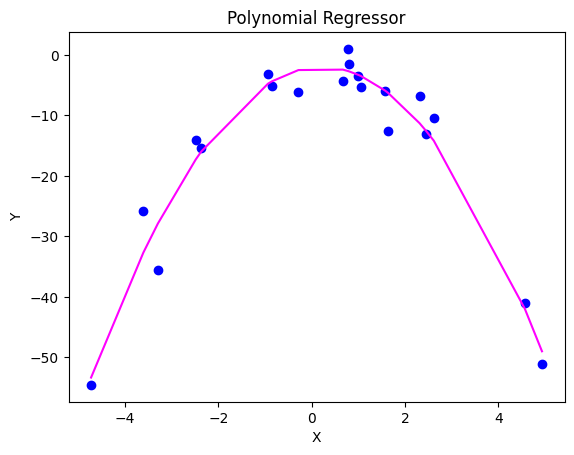

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import operator

# Step:1 Create the Dummy Data
np.random.seed(0)
x= 2 - 3 * np.random.normal(0, 1, 20)
y= x - 2 * (x ** 2) + np.random.normal(-3, 3, 20)

# Rashaping for the model
X= x[:, np.newaxis]
y= y[:, np.newaxis]

# Step 2: Polynomial Transofrmation
degree= 2 # Degree of the polynomial
poly_features= PolynomialFeatures(degree= degree)
x_poly= poly_features.fit_transform(X)

# Step 3: Train Linear Regression Model
model= LinearRegression()
model.fit(x_poly, y)
y_poly_pred= model.predict(x_poly)

# Step 4: Plotting the results
plt.scatter(X, y, color= 'blue')
sorted_axis= operator.itemgetter(0)
sorted_zip= sorted(zip(X, y_poly_pred), key= sorted_axis)
X, y_poly_pred= zip(*sorted_zip)
plt.plot(X, y_poly_pred, color='magenta')
plt.title('Polynomial Regressor')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()